# When analyzing each column with respect to prevalance of disease I would expect to find a few trends within the data:

1. Older individuals would have a higher prevalence of heart disease
2. Individuals with higher cholesterol would have a higher prevalence of heart disease
3. Men would have a higher prevalence of heart disease
4. Individuals with higher blood pressure would have a higher prevalence of heart disease
5. Individuals with a fasting blood sugar of over 120 mg/dl would have a higher prevalence of heart disease
6. Patients with exercise induced angina would have a higher prevalence of heart disease
7. Individuals with more vessels colored radioactive dye would have a higher prevalence of disease
8. individuals with a 7 thalassemia score would have a higher prevalence of disease.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart_disease_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# 1. Do older individuals have a higher prevalence of heart disease?

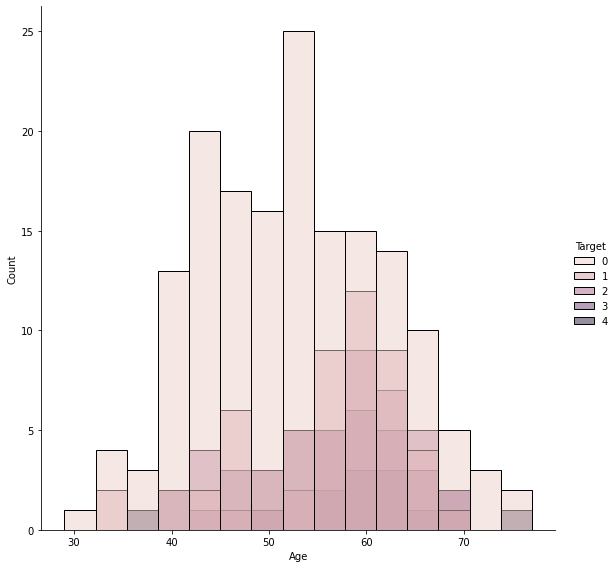

In [4]:
sns.displot(data=df, x='Age',hue='Target', height=8, bins = 15)

In [5]:
# As we can see, the mean age of those with a 1 or higher seems to be around 57 (crude estimate) 
# However, the mean of the entire dataset is around 50

# 2. Do individuals with higher cholesterol have a higher prevalence of heart disease?

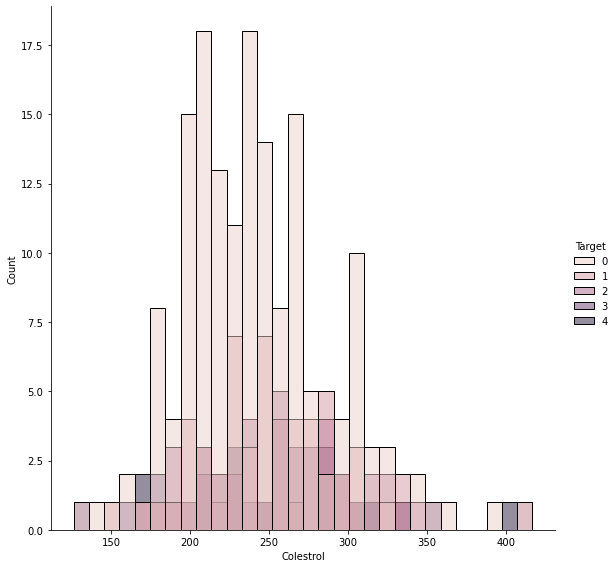

In [6]:
sns.displot(data=df, x='Colestrol',hue='Target', height=8, bins = 30)

- If we take a look at the number of patients with a cholesterol below ~230 mg/dl the proportion of people with a target val of 0 (no disease) is much higher as compared to above ~250 where the proportion of people with a target val > 0 is much higher

# 3. Do men would have a higher prevalence of heart disease?

<AxesSubplot:xlabel='Sex', ylabel='count'>

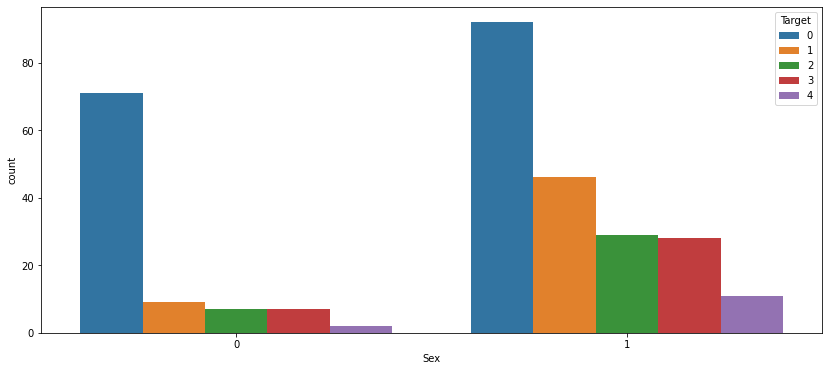

In [7]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Sex',hue='Target')

- We can see that there is a higher absolute number of patients with a target val > 0, but need to dig a little more to see percent relevance

<AxesSubplot:xlabel='Sex', ylabel='count'>

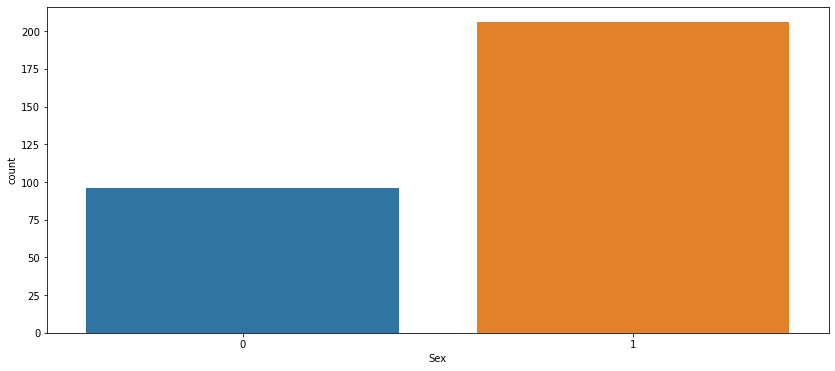

In [8]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Sex')

In [9]:
df.groupby(['Sex','Target']).count()

Unnamed: 0  Age  Chest_Pain  Resting_Blood_Pressure  Colestrol  \
Sex Target                                                                   
0   0               71   71          71                      71         71   
    1                9    9           9                       9          9   
    2                7    7           7                       7          7   
    3                7    7           7                       7          7   
    4                2    2           2                       2          2   
1   0               92   92          92                      92         92   
    1               46   46          46                      46         46   
    2               29   29          29                      29         29   
    3               28   28          28                      28         28   
    4               11   11          11                      11         11   

            Fasting_Blood_Sugar  Rest_ECG  MAX_Heart_Rate  \
Sex Target                                                  
0   0                        71        71              71   
    1                         9         9               9   
    2                         7         7               7   
    3                         7         7               7   
    4                         2         2               2   
1   0                        92        92              92   
    1                        46        46              46   
    2                        29        29              29   
    3                        28        28              28   
    4                        11        11              11   

            Exercised_Induced_Angina  ST_Depression  Slope  Major_Vessels  \
Sex Target                                                                  
0   0                             71             71     71             71   
    1                              9              9      9              9   
    2                              7              7      7              7   
    3                              7              7      7              7   
    4                              2              2      2              2   
1   0                             92             92     92             92   
    1                             46             46     46             46   
    2                             29             29     29             29   
    3                             28             28     28             28   
    4                             11             11     11             11   

            Thalessemia  
Sex Target               
0   0                71  
    1                 9  
    2                 7  
    3                 7  
    4                 2  
1   0                92  
    1                46  
    2                29  
    3                28  
    4                11

In [10]:
male_prevalence = ((46 + 29 + 28 + 11) / (92 + 46 + 29 + 28 + 11)) * 100
female_prevalence = ((9 + 7 + 7 + 2) / (71 + 9 + 7 + 7 + 2)) * 100

print(f'The percent of males with a target value of 1 or greater is {male_prevalence}%')
print(f'The percent of females with a target value of 1 or greater is {female_prevalence}%')

The percent of males with a target value of 1 or greater is 55.33980582524271%
The percent of females with a target value of 1 or greater is 26.041666666666668%


- According to this data, males are twice as likely to have a target value or 1 or greater compared to females

# 4. Do individuals with elevated blood pressure (>120mmHg) have a higher prevalence of heart disease?

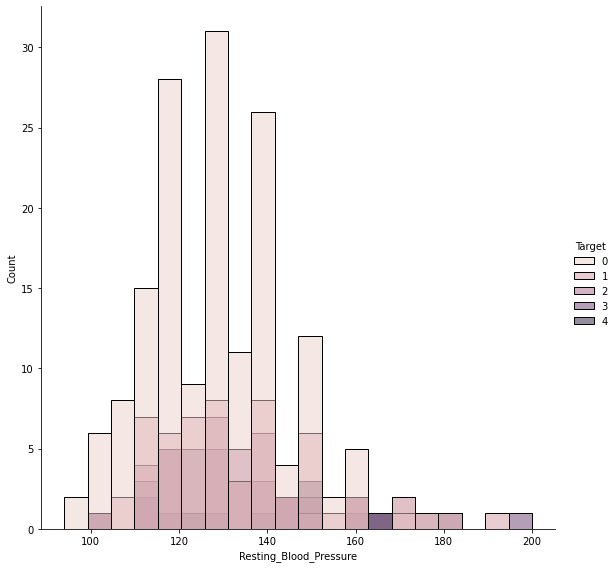

In [14]:
sns.displot(data=df, x='Resting_Blood_Pressure',hue='Target', height=8, bins = 20)

- The dataset does not indicate if these values are systolic or diastolic blood pressure, but it likely is systolic and if that is the case, we do see a larger number of individuals with a target value above 0 who have an elevated resting systolic blood pressure (elevated is >120mmHg)

# 5. Do individuals with a fasting blood sugar of over 120 mg/dl have a higher prevalence of heart disease?

<AxesSubplot:xlabel='Fasting_Blood_Sugar', ylabel='count'>

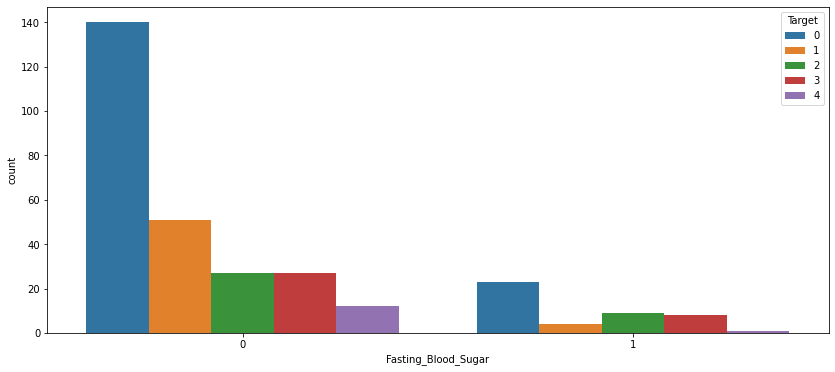

In [17]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Fasting_Blood_Sugar',hue='Target')

- We seem to be in a similar situation as when examining sex based differences

In [18]:
df.groupby(['Fasting_Blood_Sugar','Target']).count()

Unnamed: 0  Age  Sex  Chest_Pain  \
Fasting_Blood_Sugar Target                                     
0                   0              140  140  140         140   
                    1               51   51   51          51   
                    2               27   27   27          27   
                    3               27   27   27          27   
                    4               12   12   12          12   
1                   0               23   23   23          23   
                    1                4    4    4           4   
                    2                9    9    9           9   
                    3                8    8    8           8   
                    4                1    1    1           1   

                            Resting_Blood_Pressure  Colestrol  Rest_ECG  \
Fasting_Blood_Sugar Target                                                
0                   0                          140        140       140   
                    1                           51         51        51   
                    2                           27         27        27   
                    3                           27         27        27   
                    4                           12         12        12   
1                   0                           23         23        23   
                    1                            4          4         4   
                    2                            9          9         9   
                    3                            8          8         8   
                    4                            1          1         1   

                            MAX_Heart_Rate  Exercised_Induced_Angina  \
Fasting_Blood_Sugar Target                                             
0                   0                  140                       140   
                    1                   51                        51   
                    2                   27                        27   
                    3                   27                        27   
                    4                   12                        12   
1                   0                   23                        23   
                    1                    4                         4   
                    2                    9                         9   
                    3                    8                         8   
                    4                    1                         1   

                            ST_Depression  Slope  Major_Vessels  Thalessemia  
Fasting_Blood_Sugar Target                                                    
0                   0                 140    140            140          140  
                    1                  51     51             51           51  
                    2                  27     27             27           27  
                    3                  27     27             27           27  
                    4                  12     12             12           12  
1                   0                  23     23             23           23  
                    1                   4      4              4            4  
                    2                   9      9              9            9  
                    3                   8      8              8            8  
                    4                   1      1              1            1

In [20]:
normal_fbs_prevalence = ((51+27+27+12) / (140+51+27+27+12)) * 100
elevated_fbs_prevalence = ((4+9+8+1) / (23+4+9+8+1)) * 100

print(f'The percent of individuals with an elevated fasting blood glucose level and a target value of 1 or greater is {normal_fbs_prevalence}%')
print(f'The percent of individuals with a normal fasting blood glucose level and a target value of 1 or greater is {elevated_fbs_prevalence}%')

The percent of individuals with an elevated fasting blood glucose level and a target value of 1 or greater is 45.525291828793776%
The percent of individuals with a normal fasting blood glucose level and a target value of 1 or greater is 48.888888888888886%


- These two values are very similar so we can likely say there is no difference

# 6. Do patients with exercise induced angina have a higher prevalence of heart disease?

<AxesSubplot:xlabel='Exercised_Induced_Angina', ylabel='count'>

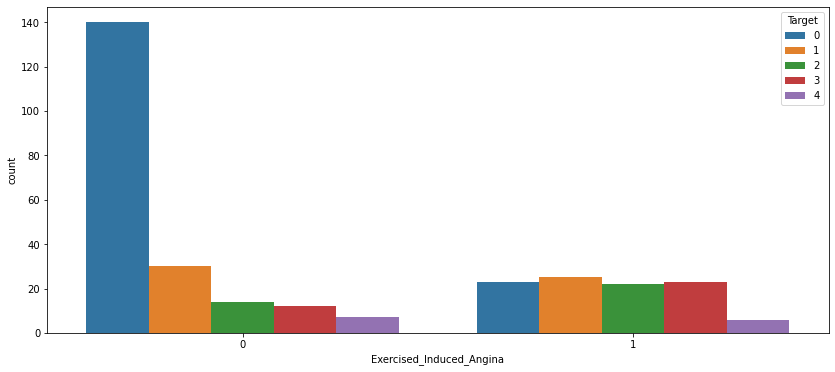

In [22]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Exercised_Induced_Angina',hue='Target')

- We see a **stark** difference between these two groups. Exercise induced angina is a strong predictor.

# 7. Do individuals with more vessels colored by radioactive dye have a higher prevalence of disease?

<AxesSubplot:xlabel='Major_Vessels', ylabel='count'>

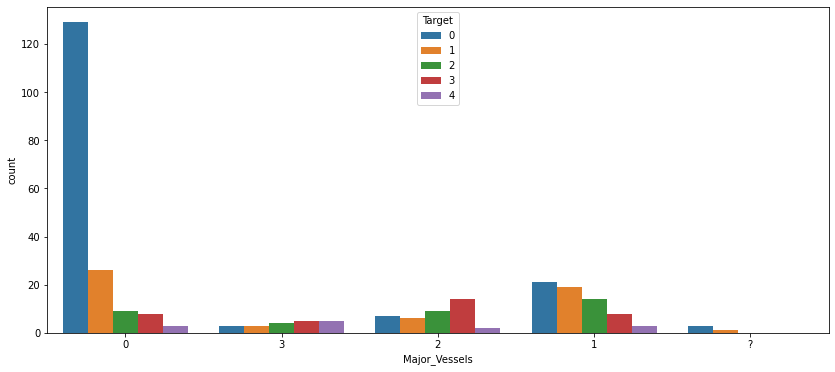

In [23]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Major_Vessels',hue='Target')

- Again we see a **stark** difference between these three groups. We will likely see a similar trend with individuals with a score of 7 in thalassemia

<AxesSubplot:xlabel='Thalessemia', ylabel='count'>

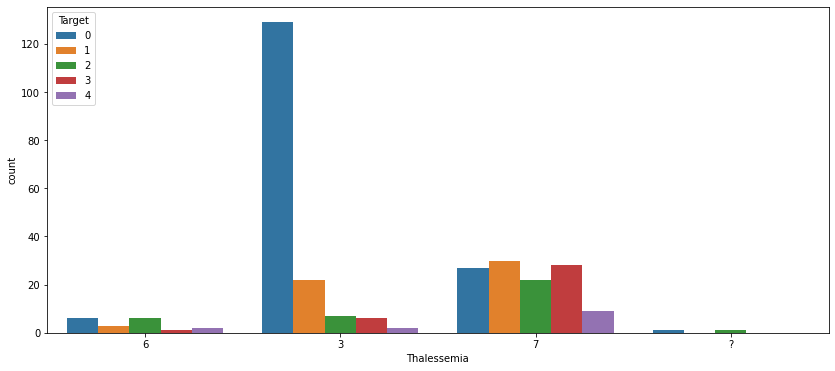

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Thalessemia',hue='Target')

# Next we can begin building our models!